In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)

In [3]:
df

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
4              26               2077                4               6935   
...           ...                ...              ...                ...   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3997            1                500                1               1401   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
4          1  
...      ...  
3994       1  
3995       1  
3996       1  
3997       0  
3998       0  

[3999 rows x 12 columns]

In [4]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df=df.drop('ID#',axis=1)

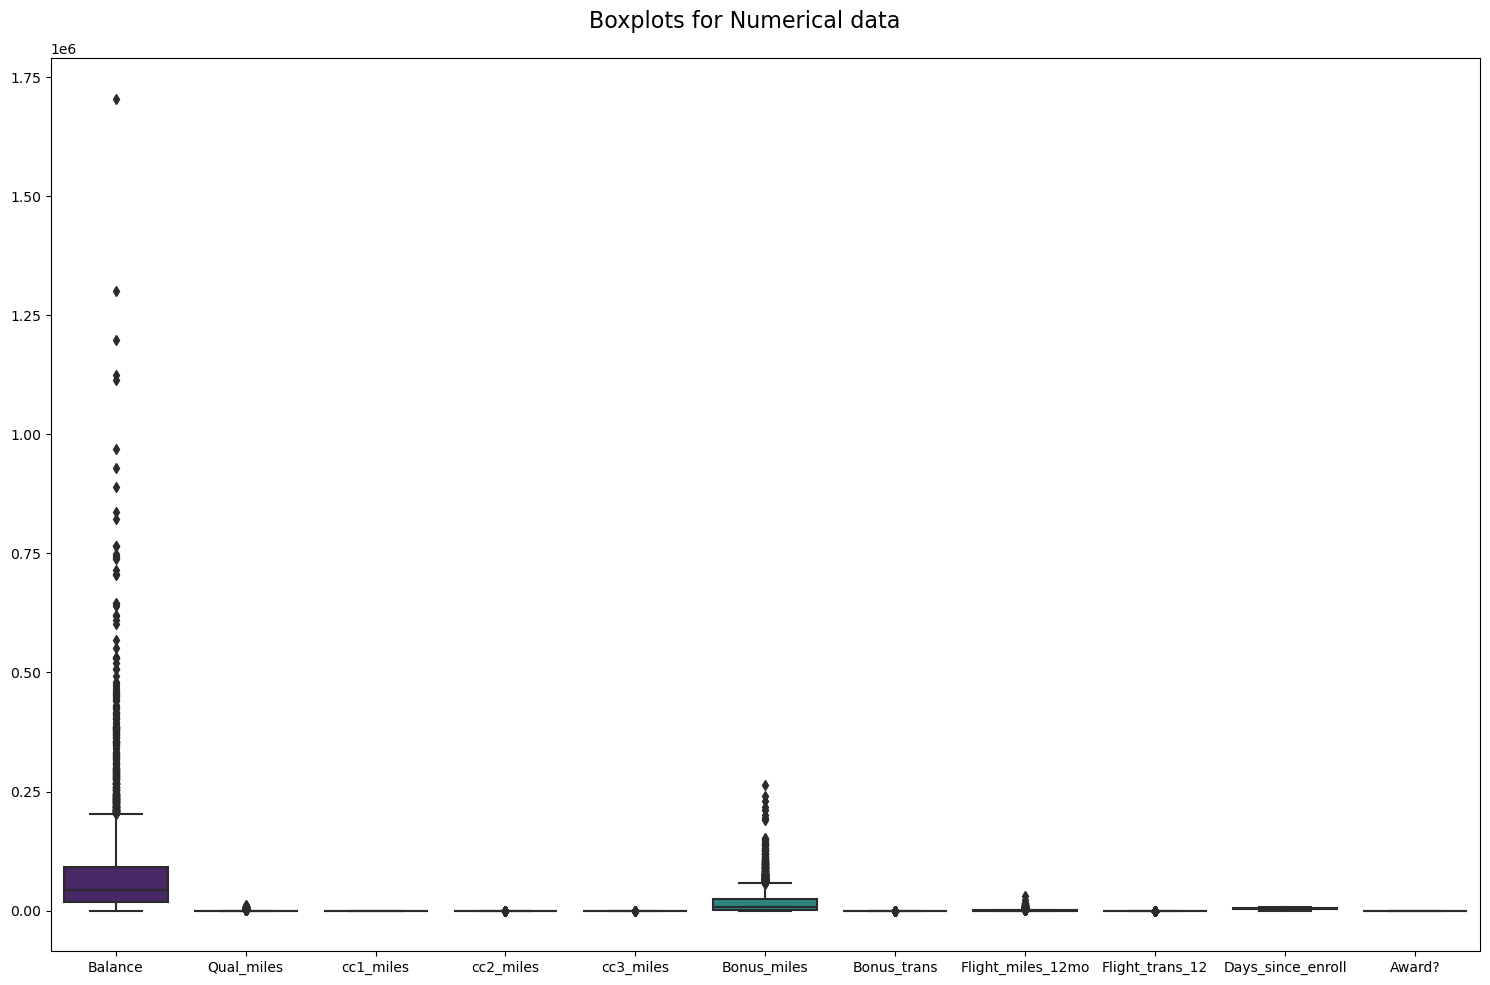

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,palette='viridis')
plt.suptitle('Boxplots for Numerical data',fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
def remove_outliers(df,columns):
    for col in columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        
        df=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]
    return df

In [9]:
columns_to_check=['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Bonus_trans']

In [10]:
df_cleaned=remove_outliers(df,columns_to_check)

In [11]:
df_cleaned

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
5       16420           0          1          1          1            0   
...       ...         ...        ...        ...        ...          ...   
3993     3974           0          1          1          1          365   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1                  0                0               7000   
1               2                  0                0               6968   
2               4                  0                0               7034   
3               1                  0                0               6952   
5               0                  0                0               6942   
...           ...                ...              ...                ...   
3993            3                  0                0               1397   
3994            4                200                1               1403   
3995            5                  0                0               1395   
3996            8                  0                0               1402   
3998            0                  0                0               1398   

      Award?  
0          0  
1          0  
2          0  
3          0  
5          0  
...      ...  
3993       0  
3994       1  
3995       1  
3996       1  
3998       0  

[2581 rows x 11 columns]

In [12]:
std_sca=StandardScaler()

In [13]:
df_scaled=std_sca.fit_transform(df_cleaned)

In [14]:
df_scaled=pd.DataFrame(df_scaled, columns=df_cleaned.columns)

In [15]:
df_scaled

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.389241         0.0  -0.687496  -0.102206  -0.029687    -0.779039   
1    -0.606224         0.0  -0.687496  -0.102206  -0.029687    -0.775708   
2    -0.067119         0.0  -0.687496  -0.102206  -0.029687    -0.458205   
3    -0.715167         0.0  -0.687496  -0.102206  -0.029687    -0.752554   
4    -0.675081         0.0  -0.687496  -0.102206  -0.029687    -0.793176   
...        ...         ...        ...        ...        ...          ...   
2576 -0.978550         0.0  -0.687496  -0.102206  -0.029687    -0.763521   
2577 -0.624950         0.0  -0.687496  -0.102206  -0.029687    -0.100567   
2578  0.494443         0.0  -0.687496  -0.102206  -0.029687    -0.713475   
2579  0.719058         0.0   1.155107  -0.102206  -0.029687     1.274250   
2580 -1.001909         0.0  -0.687496  -0.102206  -0.029687    -0.793176   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0       -1.072865          -0.247649        -0.253433           1.508978   
1       -0.937080          -0.247649        -0.253433           1.493386   
2       -0.665510          -0.247649        -0.253433           1.525544   
3       -1.072865          -0.247649        -0.253433           1.485591   
4       -1.208650          -0.247649        -0.253433           1.480718   
...           ...                ...              ...                ...   
2576    -0.801295          -0.247649        -0.253433          -1.220974   
2577    -0.665510           4.457063         2.803161          -1.218050   
2578    -0.529725          -0.247649        -0.253433          -1.221948   
2579    -0.122370          -0.247649        -0.253433          -1.218538   
2580    -1.208650          -0.247649        -0.253433          -1.220487   

        Award?  
0    -0.587939  
1    -0.587939  
2    -0.587939  
3    -0.587939  
4    -0.587939  
...        ...  
2576 -0.587939  
2577  1.700856  
2578  1.700856  
2579  1.700856  
2580 -0.587939  

[2581 rows x 11 columns]

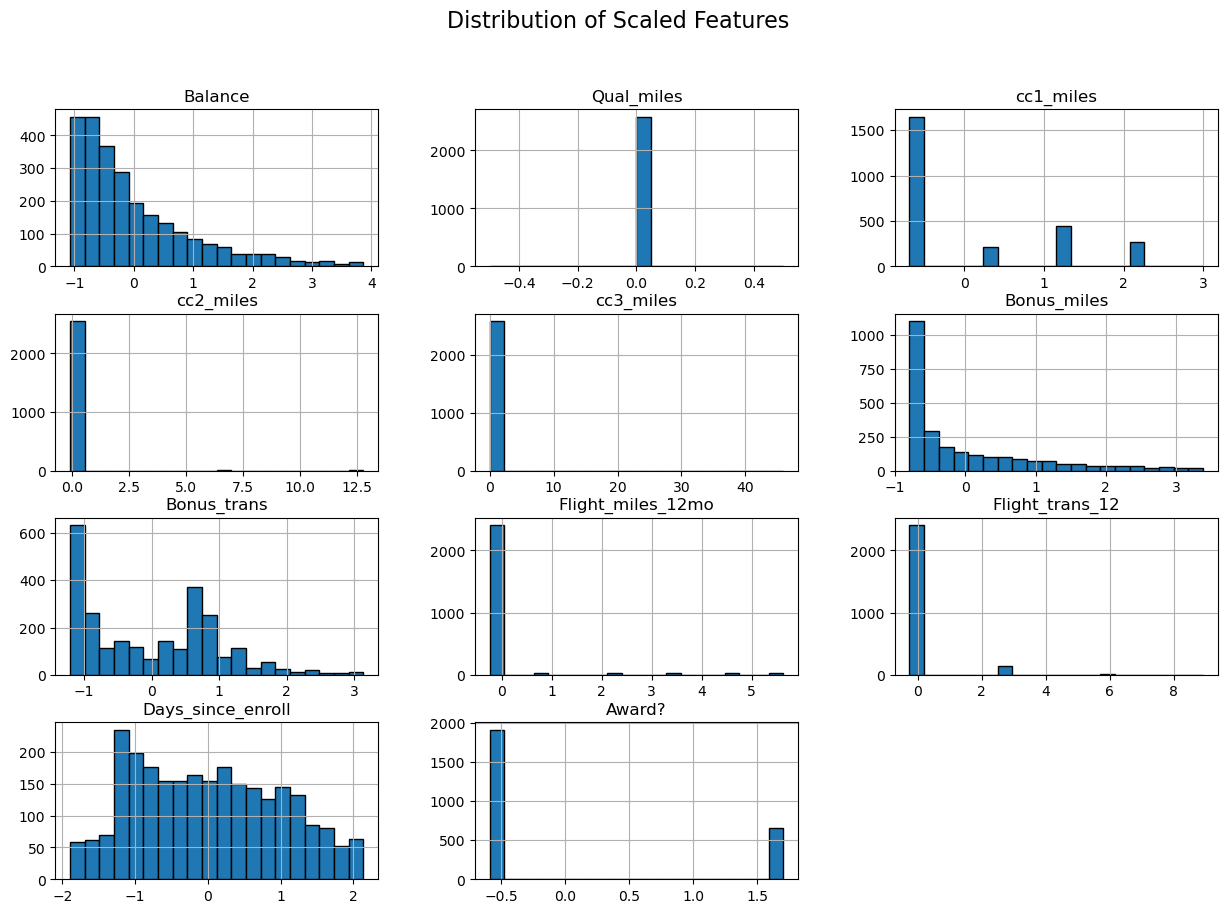

In [16]:
df_scaled.hist(figsize=(15,10),bins=20,edgecolor='black')
plt.suptitle('Distribution of Scaled Features',fontsize=16)
plt.show()

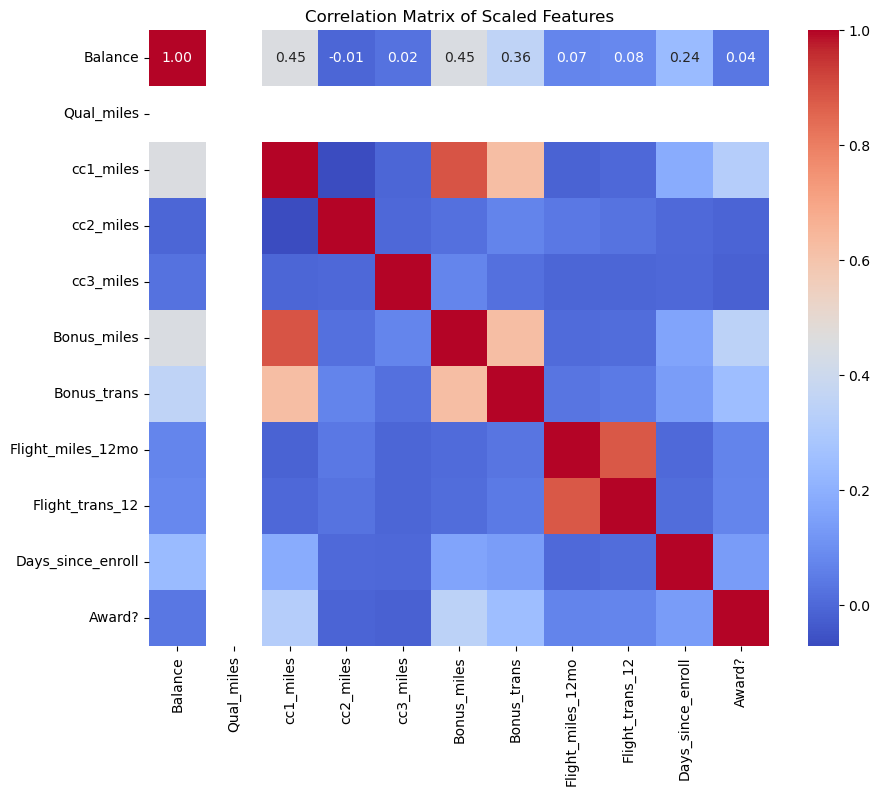

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix of Scaled Features')
plt.show()

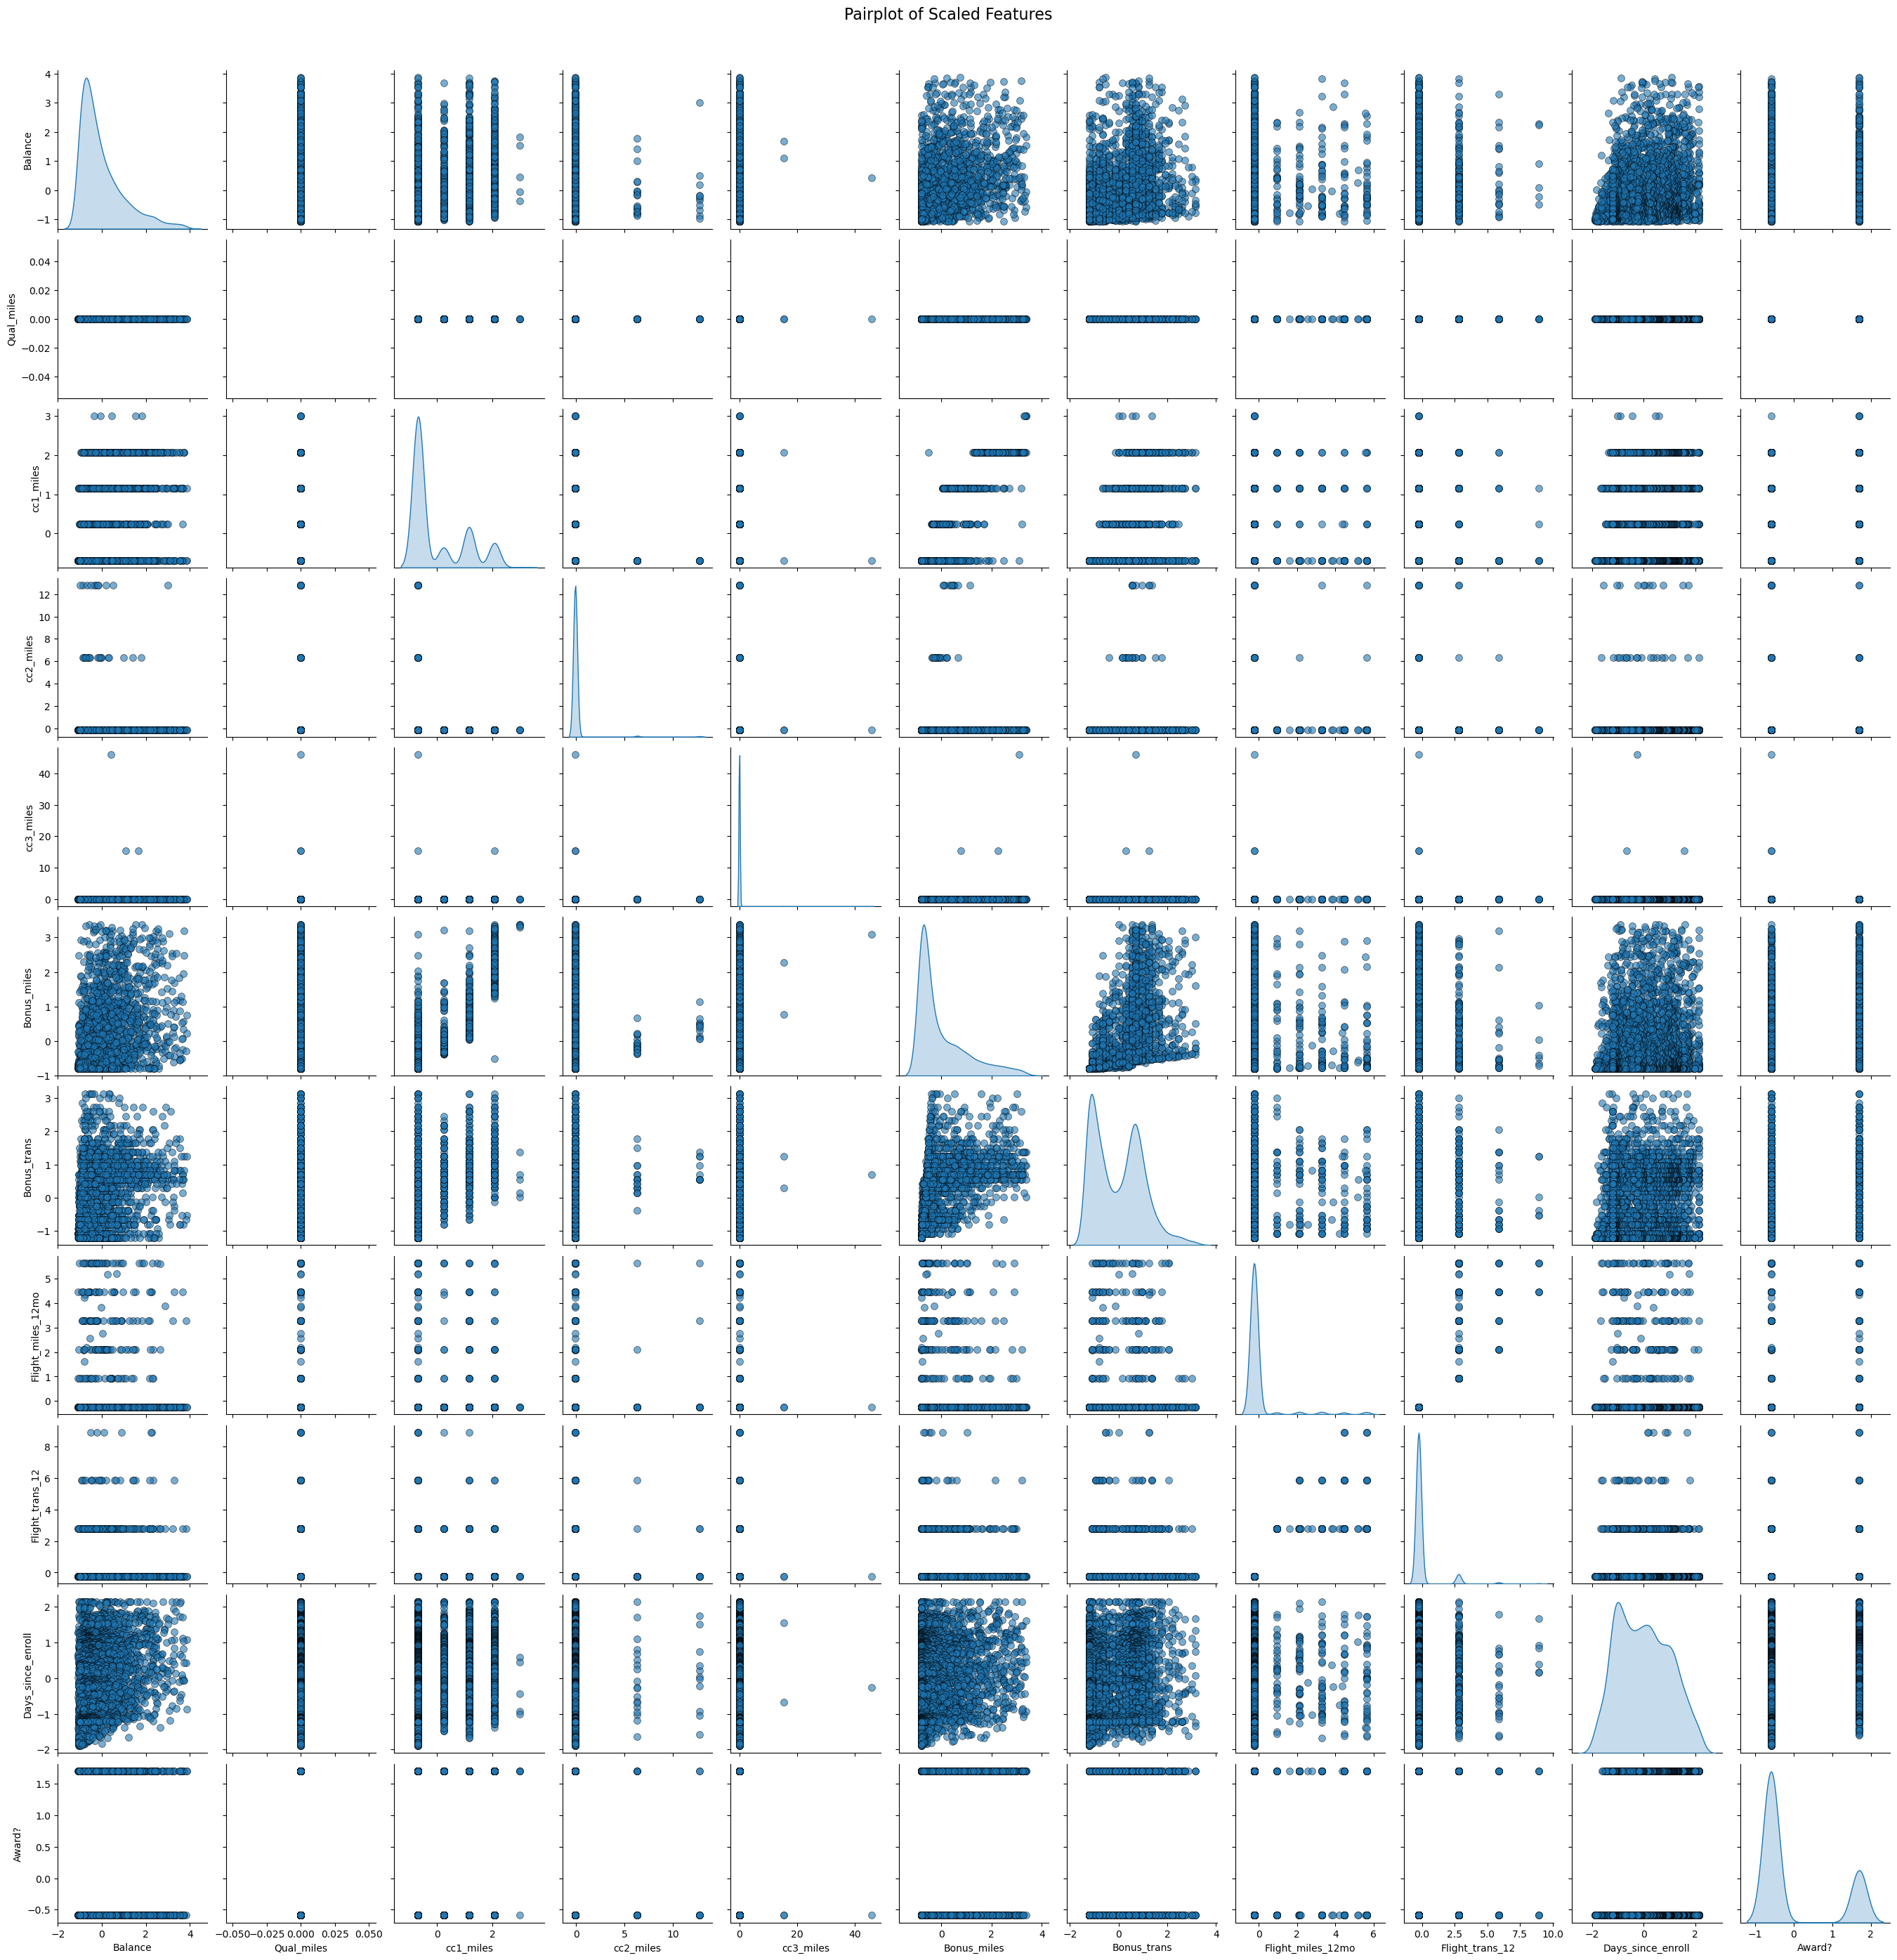

In [18]:
sns.pairplot(df_scaled, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50, 'edgecolor': 'k'})
plt.suptitle("Pairplot of Scaled Features", y=1.02, fontsize=16)
plt.show()

#### K-Mean Clustering

In [19]:
# Applying pca with 2 components

In [20]:
pca=PCA(n_components=2)

In [21]:
features_pca=pca.fit_transform(df_scaled)

In [22]:
features_pca

array([[-1.29791047, -0.25814641],
       [-1.31591795, -0.26758786],
       [-0.82617576, -0.28827579],
       ...,
       [-0.61780079, -0.12138928],
       [ 1.66819808, -0.44256307],
       [-2.09971809, -0.22390536]])

In [23]:
pca_df= pd.DataFrame(data=features_pca,columns=['pca1', 'pca2'])
pca_df

pca1      pca2
0    -1.297910 -0.258146
1    -1.315918 -0.267588
2    -0.826176 -0.288276
3    -1.405390 -0.267143
4    -1.474486 -0.258652
...        ...       ...
2576 -1.892417 -0.239077
2577 -0.288241  5.244136
2578 -0.617801 -0.121389
2579  1.668198 -0.442563
2580 -2.099718 -0.223905

[2581 rows x 2 columns]

In [24]:
kmeans=KMeans(n_clusters=5)

In [25]:
cluster=kmeans.fit(features_pca)

In [26]:
cluster

KMeans(n_clusters=5)

In [27]:
pca_df['cluster']=cluster.labels_

In [28]:
pca_df

pca1      pca2  cluster
0    -1.297910 -0.258146        4
1    -1.315918 -0.267588        4
2    -0.826176 -0.288276        0
3    -1.405390 -0.267143        4
4    -1.474486 -0.258652        4
...        ...       ...      ...
2576 -1.892417 -0.239077        4
2577 -0.288241  5.244136        2
2578 -0.617801 -0.121389        0
2579  1.668198 -0.442563        3
2580 -2.099718 -0.223905        4

[2581 rows x 3 columns]

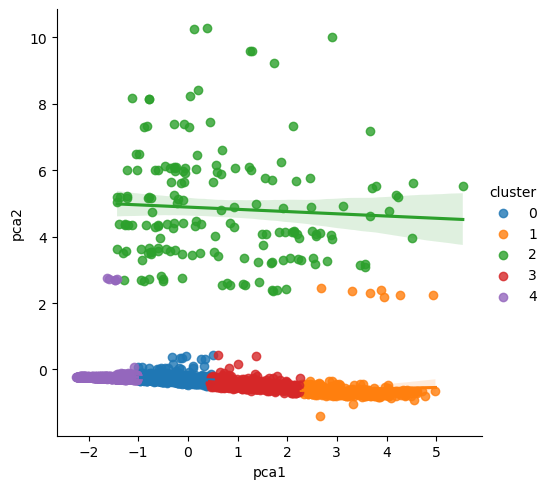

In [29]:
sns.lmplot(data=pca_df,x='pca1',y='pca2',hue='cluster')

In [30]:
# K-Mean cluster centroids
cluster.cluster_centers_

array([[-0.42614156, -0.26970371],
       [ 3.20367611, -0.6001623 ],
       [ 0.67527679,  4.84356037],
       [ 1.30179341, -0.46471592],
       [-1.60030094, -0.22514694]])

##### Insights

In [31]:
Inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pca_df)
    Inertia.append(kmeans.inertia_)
print(Inertia)

[19334.424023566797, 11123.087369122786, 6874.520502186788, 2954.5133925455607, 1458.5084963150193, 1095.6727084684105, 840.1023473738725, 747.341248472847, 671.4565035469366, 584.7969334996085]


Text(0.5, 1.0, 'Elbow Method')

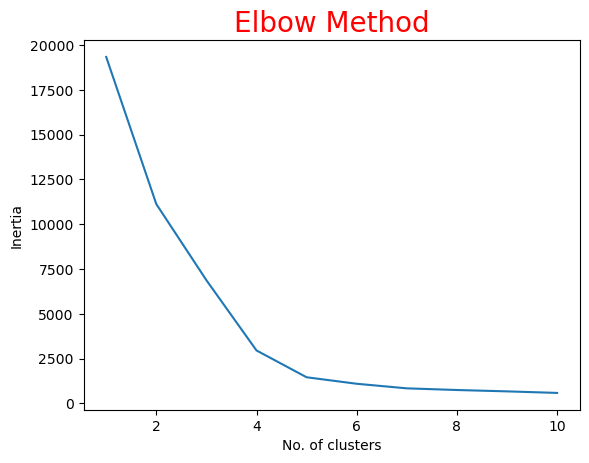

In [32]:
plt.plot(range(1,11),Inertia)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method',size=20,color='red')

In [33]:
silhouette_score(pca_df,cluster.labels_)

0.8005110411039799

In [34]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=6), k=(2, 7),
                 metric='silhouette', timings=False)

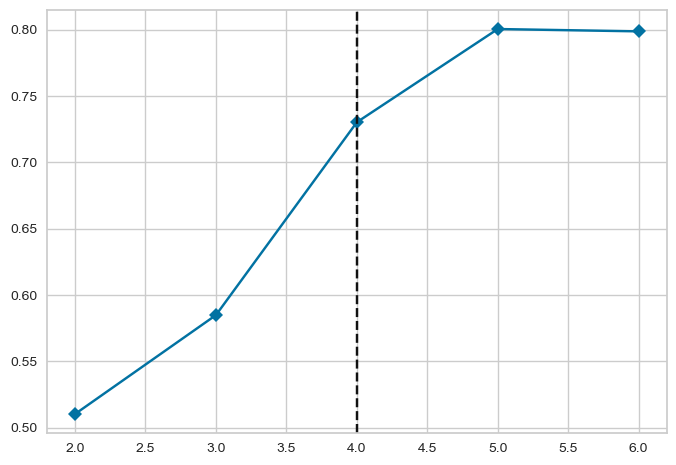

In [35]:
elbow=KElbowVisualizer(KMeans(),metric='silhouette',k=(2,7),timings=False)
elbow.fit(pca_df)

### Hierarchial Clustering

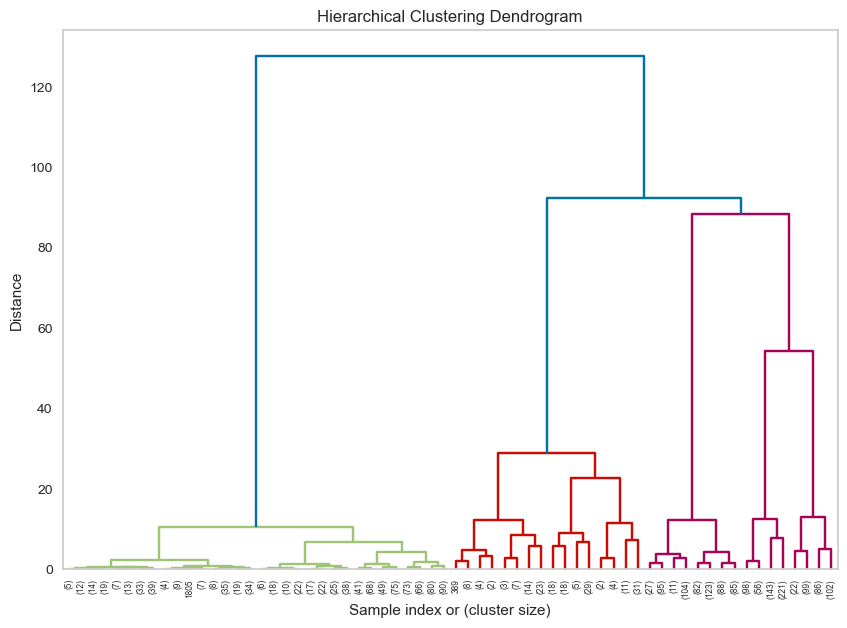

In [36]:
linked=sch.linkage(pca_df,method='ward')
plt.figure(figsize=(10,7))
sch.dendrogram(linked,truncate_mode='level',p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.grid(False)
plt.show()

In [37]:
agg=AgglomerativeClustering(n_clusters=4,linkage='ward')

In [38]:
cluster1=agg.fit(pca_df)
cluster1

AgglomerativeClustering(n_clusters=4)

In [39]:
cluster1.labels_

array([3, 3, 1, ..., 1, 0, 3], dtype=int64)

In [40]:
silhouette_score(pca_df,cluster1.labels_)

0.7300839233583147

In [41]:
output=[]
for i in range(2,11):
    labels=AgglomerativeClustering(n_clusters=i,linkage='ward').fit(pca_df).labels_
    score=silhouette_score(pca_df,cluster1.labels_)
    output.append([i,score])

In [42]:
output

[[2, 0.7300839233583147],
 [3, 0.7300839233583147],
 [4, 0.7300839233583147],
 [5, 0.7300839233583147],
 [6, 0.7300839233583147],
 [7, 0.7300839233583147],
 [8, 0.7300839233583147],
 [9, 0.7300839233583147],
 [10, 0.7300839233583147]]

##### Insights

#### DBSCAN

In [43]:
dbscan=DBSCAN(eps=0.5,min_samples=5)
dbscan_labels=dbscan.fit_predict(pca_df)

In [44]:
dbscan_silhouette=silhouette_score(pca_df,dbscan_labels)
dbscan_silhouette

0.7806230961859064

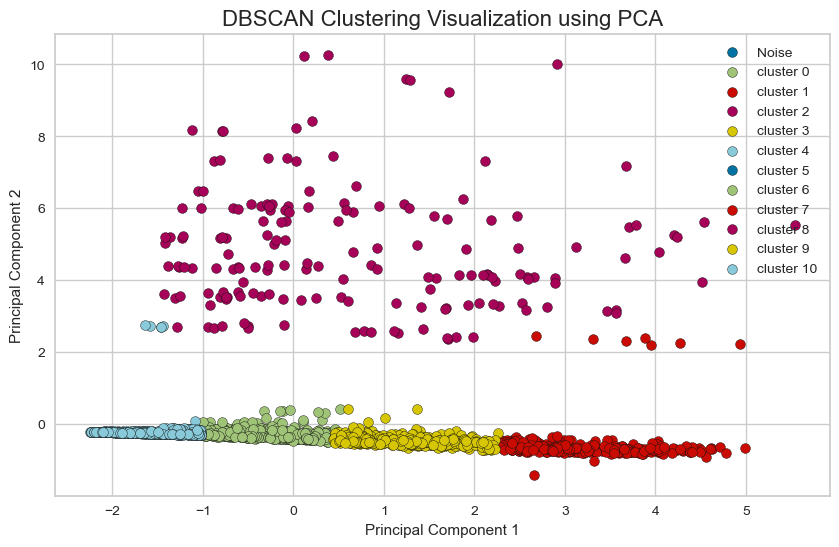

In [45]:
plt.figure(figsize=(10,6))
unique_clusters=np.unique(dbscan_labels)

colors=plt.cm.get_cmap('tab10',len(unique_clusters))

for cluster in unique_clusters:
    plt.scatter(pca_df[pca_df['cluster']==cluster]['pca1'], 
                pca_df[pca_df['cluster']==cluster]['pca2'], 
                label=f'cluster {cluster}'if cluster != -1 else'Noise',
                s=50,
                edgecolor='k',
                cmap=colors)

plt.title('DBSCAN Clustering Visualization using PCA',fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

<Axes: xlabel='pca1', ylabel='pca2'>

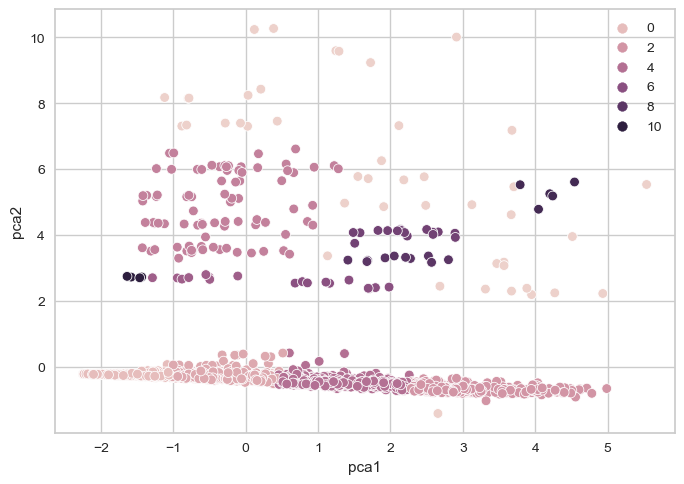

In [46]:
sns.scatterplot(data=pca_df,x='pca1',y='pca2',hue=dbscan_labels)

##### Insights

In [47]:
import plotly.express as pe

In [48]:
pe.scatter(pca_df,x='pca1',y='pca2',color=labels)